# Pandas and Illustrator

**Do these in whatever order you'd like.** Feel free to do a bar graph, then skip ahead to some Buzzfeed line graphs, etc. Start in pandas, then once you save move on over to Illustrator.

Do each group - NYT, Buzzfeed, FiveThirtyEight, Economist, Guardian - in a different notebook.  I'm only leaving spaces in these here so you can scroll through them more easily.

Be sure to check out the other notebook for **tips and hints**.

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42


In [5]:
!ls

Homework 14 - Reproductions.ipynb
Homework 14 - Tips and Hints and How-Tos.ipynb
bank-profits.csv
commute.csv
cook_pvi.csv
diversity-by-quarter.csv
gender-by-quarter.csv
generic_poll_lead.csv
order-of-australia.csv
oxfam.csv
ranked-players-with-scores.csv
scrabble-point-spread.csv
scrabble-tournament.csv
social-spending.csv


# NYT: Bar graphs

Recreate the bar charts from [this piece](https://www.nytimes.com/2017/12/20/upshot/democrats-2018-congressional-elections-polling.html) and [this piece](https://www.nytimes.com/2017/12/27/business/the-robots-are-coming-and-sweden-is-fine.html) and [this piece](https://www.nytimes.com/2017/09/29/upshot/dont-forget-the-republicans-incumbency-advantage-in-2018.html).

![](images/sample-nyt.png)

**Data:** 
   
* `generic_poll_lead.csv`
* `social-spending.csv`
* `cook_pvi.csv`

In [126]:
df_poll=pd.read_csv('social-spending.csv')
df_poll.head()

Country Social Spending
0   France           31.5%
1  Finland           30.8%
2  Belgium           29.0%
3    Italy           28.9%
4  Denmark           28.7%

In [127]:
df_poll.dtypes

Country            object
Social Spending    object
dtype: object

In [128]:
df_poll['Country2'] =df_poll['Country'] +'  '+ df_poll['Social Spending']

In [129]:
df_poll['Social Spending'] = df_poll['Social Spending'].str.replace('%$','')

In [134]:
df_poll.head()

Country Social Spending        Country2
0   France            31.5   France  31.5%
1  Finland            30.8  Finland  30.8%
2  Belgium            29.0  Belgium  29.0%
3    Italy            28.9    Italy  28.9%
4  Denmark            28.7  Denmark  28.7%

In [135]:
df_poll['Social Spending'] = df_poll['Social Spending'].astype(float)

In [136]:
df_poll.dtypes

Country             object
Social Spending    float64
Country2            object
dtype: object

In [137]:
df_poll.sort_values(by='Social Spending', ascending=True)

Country  Social Spending               Country2
35          Mexico              7.5           Mexico  7.5%
34     South Korea             10.4     South Korea  10.4%
33           Chile             11.2           Chile  11.2%
32          Turkey             13.5          Turkey  13.5%
31          Latvia             14.5          Latvia  14.5%
30         Iceland             15.2         Iceland  15.2%
29          Israel             16.1          Israel  16.1%
28         Ireland             16.1         Ireland  16.1%
27          Canada             17.2          Canada  17.2%
26         Estonia             17.4         Estonia  17.4%
25        Slovakia             18.6        Slovakia  18.6%
24       Australia             19.1       Australia  19.1%
23   United States             19.3   United States  19.3%
22  Czech Republic             19.4  Czech Republic  19.4%
21     New Zealand             19.5     New Zealand  19.5%
20     Switzerland             19.7     Switzerland  19.7%
19          Poland             20.2          Poland  20.2%
18         Hungary             20.6         Hungary  20.6%
17   O.E.C.D. avg.             21.0   O.E.C.D. avg.  21.0%
16         Britain             21.5         Britain  21.5%
15      Luxembourg             21.8      Luxembourg  21.8%
14     Netherlands             22.0     Netherlands  22.0%
13        Slovenia             22.8        Slovenia  22.8%
12           Japan             23.1           Japan  23.1%
11        Portugal             24.1        Portugal  24.1%
10           Spain             24.6           Spain  24.6%
7           Greece             25.0          Greece  25.0%
9           Norway             25.1          Norway  25.1%
8          Germany             25.3         Germany  25.3%
6           Sweden             27.1          Sweden  27.1%
5          Austria             27.8         Austria  27.8%
4          Denmark             28.7         Denmark  28.7%
3            Italy             28.9           Italy  28.9%
2          Belgium             29.0         Belgium  29.0%
1          Finland             30.8         Finland  30.8%
0           France             31.5          France  31.5%

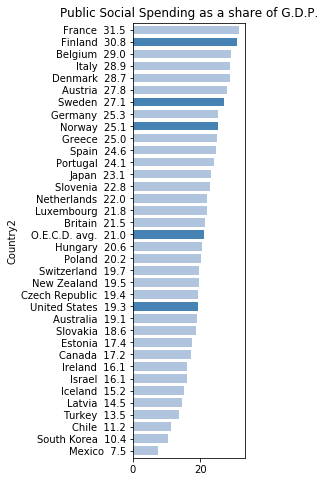

In [178]:
def build_colors(row):
    if row['Country'] == 'Finland':
        return 'steelblue'
    elif row['Country'] == 'Sweden':
        return 'steelblue'
    elif row['Country'] == 'Norway':
        return 'steelblue'
    elif row['Country'] == 'United States':
        return 'steelblue'
    elif row['Country'] == 'O.E.C.D. avg.':
        return 'steelblue'
    else:
        return 'lightsteelblue'

colors = df.reset_index().apply(build_colors, axis=1)

df.plot(x='Country2',
        y='Social Spending',
        kind='barh',
        figsize=(2,8),
        width=0.7,
        legend=False,
        color=colors,
        title="Public Social Spending as a share of G.D.P.",
        edgecolor = "none",
        linewidth=0
        
        )


# plt.savefig("output1.pdf",bbox_inches = "tight")

# Buzzfeed: Diversity in the Agriculture Department

You are going to recreate the two line-graph visualizations in [this piece](https://www.buzzfeed.com/jsvine/agriculture-department-political-appointee-diversity) by the super-famous [Jeremy Singer-Vine](https://twitter.com/jsvine). If he can do it, you can too!

![](images/buzzfeed.png)

**I've included the 100% beautiful, cleaned up data:** `gender-by-quarter.csv` and `diversity-by-quarter.csv`.

Since there isn't much cleaning to do, this work is mostly going to be about **how to move between pandas/matplotlib and finish things up in Illustrator.**


# FiveThirtyEight: What makes Nigel Richards the best at Scrabble?

You are going to recreate the visualizations in [this piece](https://fivethirtyeight.com/features/what-makes-nigel-richards-the-best-scrabble-player-on-earth/) by [Oliver Roeder](https://twitter.com/ollie). This is one of my favorite series of charts in all of history! 

(When you break them down by divisions, though, don't draw the circles.)

![](images/sample-538.png)

**I've included the data, but there's a little work to be done:** 

* `scrabble-point-spread.csv` - the points for and against each player at Nationals from one year (2013)
* `scrabble-tournament.csv` - rating and division data for each player at Nationals from one year (2013)
* `ranked-players-with-scores.csv` - the top 200 ranked players and their average points per game (2018)

Note that the ranking data is from 2018 so the graph that uses it will look a bit different.


# The Economist

Recreate the donut chart from [this piece](https://www.economist.com/blogs/graphicdetail/2012/07/daily-chart-0) even though [they're terrible](https://peltiertech.com/chart-busters-the-economist-doesnt-read-forbes/).

![](images/economist.png)

In fact, the pies are _so terrible_ we're going to **recreate the [revised chart](https://peltiertech.com/chart-busters-the-economist-doesnt-read-forbes/), too**. The important thing about it is that while the original chart focuses on the actual values in 2007 and 2011, the arrow chart reduces those values to **just the change**, which is (arguably) the important part.

![](images/econ-revised.png)

The revised chart is ugly, though, so we're going to make it look nicer.

1. Slightly change the chart type (See Homework Hints file)
2. Change the colors (Make it match the Economist)
3. Change any other styles/font/etc (Make it match the Economist
4. Order the bars (Order by what? Up to you.)

**Data:** 
   
* `bank-profits.csv`

# The Guardian

We'll be recreating a single graph each from 

1. [this piece](https://www.theguardian.com/news/datablog/2018/jan/26/no-equality-in-the-honours-two-thirds-of-australia-day-awards-go-to-men)
2. and [this piece](https://www.theguardian.com/inequality/datablog/2017/jul/17/which-countries-most-and-least-committed-to-reducing-inequality-oxfam-dfi)
3. and [this piece](https://www.theguardian.com/money/datablog/2017/jan/06/tracking-the-cost-uk-and-european-commuter-rail-fares-compared-in-data)

![](images/guardian.png)

We'll be using skills from the Economist revision, so **please do that one first!**

**Data:**

* `order-of-australia.csv`
* `oxfam.csv`
* `commute.csv`